In [1]:
import numpy as np
import tflearn
import tflearn.activations as activations
# Data loading and preprocessing
from tflearn.activations import relu
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.conv import avg_pool_2d, conv_2d, max_pool_2d
from tflearn.layers.core import dropout, flatten, fully_connected, input_data
from tflearn.layers.merge_ops import merge
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.normalization import batch_normalization

#christiaan: libraries
import tensorflow as tf
import os

from matplotlib import pyplot as plt
import cv2
from test_recursive_image_load_V2 import load_CKP_data
from face_detect import cutFace


hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
# Paths to define for each specific computer

# cascPath = the path to the cascade file for the facerecognition (relative paths didn't work on my windows edition)
cascPath = "G:/Documenten/personal/school/MaNaMA_AI/thesis/implementation/dexpression/github_1/DeXpression-master_chris/haarcascade.xml"

#DataPath = path to the CK+ directory of the Cohn-Kanade dataset
dataPath = 'G:/Documenten/personal/school/MaNaMA_AI/thesis/databases/wikipedia_list/cohn-Kanade/CK+'

--------- Overal stattistics ---------  
amount of Subjects  : 118
amount of Instances : 327
code = 0 = Neutral    0 instances: 0.00
code = 1 = Anger      45 instances: 13.76
code = 2 = Contempt   18 instances: 5.50
code = 3 = Disgust    59 instances: 18.04
code = 4 = Fear       25 instances: 7.65
code = 5 = Happy      69 instances: 21.10
code = 6 = Saddness   28 instances: 8.56
code = 7 = Surprise   83 instances: 25.38
--------- dimensions ---------  
--------- last elements in lists ---------  
length X_data327
length Y_data327


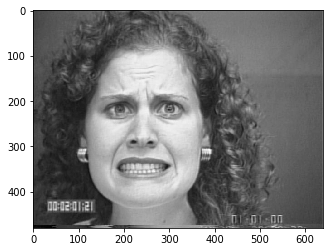

length Y_data 4
image type <class 'int'>
G:\Documenten\personal\school\MaNaMA_AI\thesis\implementation\dexpression\github_1\DeXpression-master_chris
<class 'list'>
<class 'list'>
<class 'list'>


In [3]:
# Give a run ID here. Change it to flags (arguments) in version 2.
ID = '4_1'
RUNID = 'DeXpression_run_' + ID

# Give a dropout if required (change to True and define the dropout percentage).
dropout = False
dropout_keep_prob=0.5

# Load data
data = load_CKP_data(datasetPath = dataPath,printData = 0)
print(os.getcwd())
images = data[0]

print(type(data))
print(type(data[0]))
print(type(data[1]))





In [ ]:
#generate indexes of the images that need to be in the seperate test data
# testIdx=np.random.randint(0,len(data[0]),30)
import random
testIdx = np.asarray(random.sample(range(0,len(data[0])), 30))
print(testIdx)
print(type(testIdx))

In [ ]:
# process images to detect the face and cut it out to 224x224x1

# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

print(faceCascade.getFeatureType())

X_gray = []
X_test = []

for i in range(0,len(images)):
    
   
    print("---------------------------------------------")
    print('image ', i)
    print(type(images[i]))
    print(type((images[i])[0]))
    print(images[i].dtype)
    print((images[i])[0].dtype)
    print(images[i].shape)
     
    
#     cv2.imshow("Faces found", img)
#     cv2.waitKey(0)
    
    cut_img = cutFace(images[i],224,224,faceCascade)
    
    stre = "Face found image " +  repr(i)
    
#     plt.figure('test image 10')
#     plt.imshow(cut_img, cmap='gray')
#     plt.show()
    
#     print(cut_img.dtype)
#     print(cut_img.shape)
    
   
    
    X_gray = np.append(X_gray,cut_img)
    
    
#     cv2.imshow(stre, cut_img)
#     print("x-co: ",x, "y-co: ",y, "width: ",w, "height: ",h)
#     cv2.waitKey(0)

In [ ]:
X_gray = X_gray.reshape([-1,224,224,1])
print(X_gray.shape)

In [ ]:

# if np.isin(i,testIdx):
#     print("image ", i, " is part of TEST set")
# else:
#     print("image ", i, " is part of TRAIN set")


In [ ]:
plt.figure('test image 15')
plt.imshow(X_gray[15].reshape((224,224)), cmap='gray')
plt.title('image 15')
plt.figure('test image 30')
plt.imshow(X_gray[30].reshape((224,224)), cmap='gray')
plt.title('image 30')
plt.figure('test image 155')
plt.imshow(X_gray[155].reshape((224,224)), cmap='gray')
plt.title('image 155')
plt.figure('test image 223')
plt.imshow(X_gray[223].reshape((224,224)), cmap='gray')
plt.title('image 223')
plt.show()

In [ ]:
print(data[1])

# inst = np.zeros(7)
# inst[((data[1])[0])-1] = 1
    
# Y = np.asarray(inst)
# Y = Y.flatten()

# print(Y)

labels = []

for lab in data[1]:
#     print(lab)
    #create a vector of 7 zeros only one of these elements is set to 1 indicating the emotion label
    inst = np.zeros(7)
    inst[lab-1] = 1
    #print (inst)
    labels = np.append(labels,inst)
    
print("size Y 2: " + repr(labels.shape))
    
labels = labels.reshape([-1,7])

print("size labels flatten: " + repr(len(labels)))
print("size labels shape: " + repr(labels.shape))
print("type labels: " + repr(type(labels)))


In [ ]:
#temporary limited to 30 faces for testin

# X = X_gray[0:30]
# sizeStrX = repr(len(X))
# print("size X: " + repr(len(X)))
# print("type X: " + repr(type(X)))

# Y = labels[0:30]

X = []
Y = []
X_test =[]
Y_test = []

print(len(X_gray))

for i in range(0,len(X_gray)):
    if np.isin(i,testIdx):
#         print("image ", i, " is part of TEST set")
        X_test = np.append(X_test,X_gray[i])
        Y_test = np.append(Y_test,labels[i])
    else:
#         print("image ", i, " is part of TRAIN set")
        X = np.append(X,X_gray[i])
        Y = np.append(Y,labels[i])


In [ ]:
X = X.reshape([-1,224,224,1])
Y = Y.reshape([-1,7])
X_test = X_test.reshape([-1,224,224,1])
Y_test = Y_test.reshape([-1,7])

print("shape X: " + repr(X.shape))
print("type X: " + repr(type(X)))
print("size Y: " + repr(Y.shape))
print("type Y: " + repr(type(Y)))
print("size X_test: " + repr(X_test.shape))
print("type X_test: " + repr(type(X_test)))
print("size Y_test: " + repr(Y_test.shape))
print("type Y_test: " + repr(type(Y_test)))

In [ ]:

# Define number of output classes.
num_classes = 7

# Define padding scheme.
padding = 'VALID'

# Model Architecture
network = input_data(shape=[None, 224, 224, 1]) #shape =[batch,X,Y,Z] array of grayscale images of 224x224x1 http://tflearn.org/layers/core/
conv_1 = relu(conv_2d(network, 64, 7, strides=2, bias=True, padding=padding, activation=None, name='Conv2d_1'))
maxpool_1 = batch_normalization(max_pool_2d(conv_1, 3, strides=2, padding=padding, name='MaxPool_1'))
#LRN_1 = local_response_normalization(maxpool_1, name='LRN_1')
# FeatEX-1g
conv_2a = relu(conv_2d(maxpool_1, 96, 1, strides=1, padding=padding, name='Conv_2a_FX1'))
maxpool_2a = max_pool_2d(maxpool_1, 3, strides=1, padding=padding, name='MaxPool_2a_FX1')
conv_2b = relu(conv_2d(conv_2a, 208, 3, strides=1, padding=padding, name='Conv_2b_FX1'))
conv_2c = relu(conv_2d(maxpool_2a, 64, 1, strides=1, padding=padding, name='Conv_2c_FX1'))
FX1_out = merge([conv_2b, conv_2c], mode='concat', axis=3, name='FX1_out')
# FeatEX-2
conv_3a = relu(conv_2d(FX1_out, 96, 1, strides=1, padding=padding, name='Conv_3a_FX2'))
maxpool_3a = max_pool_2d(FX1_out, 3, strides=1, padding=padding, name='MaxPool_3a_FX2')
conv_3b = relu(conv_2d(conv_3a, 208, 3, strides=1, padding=padding, name='Conv_3b_FX2'))
conv_3c = relu(conv_2d(maxpool_3a, 64, 1, strides=1, padding=padding, name='Conv_3c_FX2'))
FX2_out = merge([conv_3b, conv_3c], mode='concat', axis=3, name='FX2_out')
net = flatten(FX2_out)
if dropout:
    net = dropout(net, dropout_keep_prob)
loss = fully_connected(net, num_classes,activation='softmax')

# Compile the model and define the hyperparameters
network = tflearn.regression(loss, optimizer='Adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.0001)

# Final definition of model checkpoints and other configurations
model = tflearn.DNN(network, checkpoint_path='./DeXpression_checkpoints',
                    max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir="./tflearn_logs/")


In [ ]:
#create a custom tensorflow session to manage the used resources
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session_1 = tf.Session(config = config)

# Final definition of model checkpoints and other configurations
model = tflearn.DNN(network, checkpoint_path='./DeXpression_checkpoints',
                    max_checkpoints=1, tensorboard_verbose=2, tensorboard_dir="./tflearn_logs/",session = session_1)



In [ ]:
print(len(X))
print(len(Y))
print(X[0].shape)
# print(Y[0].shape)

In [ ]:
#'G:\Documenten\personal\school\MaNaMA_AI\thesis\implementation\dexpression\github_1\DeXpression-master_chris''

# Fit the model, train for 20 epochs. (Change all parameters to flags (arguments) on version 2.)
print("------------ start training on the data -------------")
model.fit(X, Y, n_epoch=20, validation_set=(X_test,Y_test), shuffle=True, show_metric=True,snapshot_epoch=True,batch_size=20, run_id=RUNID)

# Save the model
#model.save('./DeXpression_checkpoints/' + RUNID + '.model')

# Load the model if required, later.
#model.load('./DeXpression_checkpoints/' + RUNID + '.model')